In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
sns.set_context('notebook', font_scale=1.5, rc={'lines.markeredgewidth': 2})

In [2]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

In [3]:
import visual_behavior.data_access.loading as loading
import visual_behavior.visualization.qc.experiment_plots as ep
import visual_behavior.visualization.qc.container_plots as cp

import visual_behavior.visualization.ophys.summary_figures as sf
import visual_behavior.visualization.utils as utils

Note: need to be on this SDK branch: 

https://github.com/AllenInstitute/AllenSDK/tree/rc/2.13.5


To deal with this bug: 

https://github.com/AllenInstitute/AllenSDK/issues/2304

Until further notice

In [4]:
import allensdk
allensdk.__version__

'2.13.5'

### get data cache using `from_lims` method

In [5]:
from allensdk.brain_observatory.behavior.behavior_project_cache import VisualBehaviorOphysProjectCache

cache = VisualBehaviorOphysProjectCache.from_lims()

### get experiments table for learning mFISH pilot experiments

`ophys_experiment_table` contains a record of each unique 2P field of view recorded in each session. 
One `ophys_session_id` can have 8 imaging planes, corresonding to 8 `ophys_experiment_ids`. 
A given imaging plane that is recorded across multiple sessions is linked by its `ophys_container_id`. 

In [6]:
experiments_table = cache.get_ophys_experiment_table(passed_only=False)

experiments = experiments_table[experiments_table.project_code=='LearningmFISHTask1A']
experiments.head()

,equipment_name,donor_id,full_genotype,mouse_id,reporter_line,driver_line,sex,age_in_days,foraging_id,cre_line,...,session_name,isi_experiment_id,imaging_depth,targeted_structure,published_at,date_of_acquisition,session_type,experience_level,passive,image_set
ophys_experiment_id,,,,,,,,,,,,,,,,,,,,,
1154288458,MESO.2,1142290477,Gad2-IRES-Cre/wt;Slc32a1-T2A-FlpO/wt;Ai195(TIT...,603892,Ai195(TIT2L-GC7s-ICF-IRES-tTA2)-hyg,"[Slc32a1-T2A-FlpO, Gad2-IRES-Cre]",M,116.0,130a7f92-a251-4aa0-abdb-90683d6be53e,Gad2-IRES-Cre,...,20220126_603892_training2,1145918593,165,VISp,NaT,2022-01-26 10:42:34,TRAINING_2_gratings_flashed,None,False,i
1154288461,MESO.2,1142290477,Gad2-IRES-Cre/wt;Slc32a1-T2A-FlpO/wt;Ai195(TIT...,603892,Ai195(TIT2L-GC7s-ICF-IRES-tTA2)-hyg,"[Slc32a1-T2A-FlpO, Gad2-IRES-Cre]",M,116.0,130a7f92-a251-4aa0-abdb-90683d6be53e,Gad2-IRES-Cre,...,20220126_603892_training2,1145918593,265,VISp,NaT,2022-01-26 10:42:34,TRAINING_2_gratings_flashed,None,False,i
1154288463,MESO.2,1142290477,Gad2-IRES-Cre/wt;Slc32a1-T2A-FlpO/wt;Ai195(TIT...,603892,Ai195(TIT2L-GC7s-ICF-IRES-tTA2)-hyg,"[Slc32a1-T2A-FlpO, Gad2-IRES-Cre]",M,116.0,130a7f92-a251-4aa0-abdb-90683d6be53e,Gad2-IRES-Cre,...,20220126_603892_training2,1145918593,170,VISl,NaT,2022-01-26 10:42:34,TRAINING_2_gratings_flashed,None,False,i
1154288465,MESO.2,1142290477,Gad2-IRES-Cre/wt;Slc32a1-T2A-FlpO/wt;Ai195(TIT...,603892,Ai195(TIT2L-GC7s-ICF-IRES-tTA2)-hyg,"[Slc32a1-T2A-FlpO, Gad2-IRES-Cre]",M,116.0,130a7f92-a251-4aa0-abdb-90683d6be53e,Gad2-IRES-Cre,...,20220126_603892_training2,1145918593,270,VISl,NaT,2022-01-26 10:42:34,TRAINING_2_gratings_flashed,None,False,i
1154288467,MESO.2,1142290477,Gad2-IRES-Cre/wt;Slc32a1-T2A-FlpO/wt;Ai195(TIT...,603892,Ai195(TIT2L-GC7s-ICF-IRES-tTA2)-hyg,"[Slc32a1-T2A-FlpO, Gad2-IRES-Cre]",M,116.0,130a7f92-a251-4aa0-abdb-90683d6be53e,Gad2-IRES-Cre,...,20220126_603892_training2,1145918593,175,VISal,NaT,2022-01-26 10:42:34,TRAINING_2_gratings_flashed,None,False,i


In [7]:
experiments.mouse_id.unique()

array(['603892'], dtype=object)

### get behavior sessions for our special mouse

In [8]:
behavior_sessions = cache.get_behavior_session_table(passed_only=False)

In [9]:
mouse_beh_data = behavior_sessions[behavior_sessions.mouse_id=='603892'].sort_values(by='date_of_acquisition')
mouse_beh_data[['mouse_id', 'session_type', 'ophys_experiment_id']]

,mouse_id,session_type,ophys_experiment_id
behavior_session_id,,,
1153004187,603892,TRAINING_0_gratings_autorewards_15min,NaN
1153543065,603892,TRAINING_1_gratings,NaN
1153793704,603892,TRAINING_1_gratings,"[1153920566, 1153920568, 1153920569, 115392057..."
1154034257,603892,TRAINING_2_gratings_flashed,"[1154288458, 1154288461, 1154288463, 115428846..."
1154262140,603892,TRAINING_2_gratings_flashed,"[1154369474, 1154369476, 1154369477, 115436947..."
1154472358,603892,TRAINING_3_images_A_10uL_reward,"[1154572286, 1154572288, 1154572289, 115457229..."
1155069835,603892,TRAINING_3_images_A_10uL_reward,"[1155282289, 1155282293, 1155282294, 115528229..."
1155426295,603892,TRAINING_4_images_A_training,"[1155524637, 1155524639, 1155524640, 115552464..."
1155634565,603892,TRAINING_5_images_A_epilogue,"[1155760201, 1155760204, 1155760205, 115576020..."


### get ophys_containers for special mouse 

In [10]:
mouse_data = experiments[experiments.mouse_id=='603892'].sort_values(by='date_of_acquisition')
ophys_container_ids = mouse_data.ophys_container_id.unique()
len(ophys_container_ids)

8

### pick a container and experiment

In [11]:
ophys_container_id = 1157145092
experiment_id = experiments[experiments.ophys_container_id==ophys_container_id].index.values[9]
experiment_id

1155949168

### load ophys dataset for this experiment

In [12]:
dataset = cache.get_behavior_ophys_experiment(experiment_id)

C:\Users\marinag\Documents\Code\AllenSDK\allensdk\brain_observatory\behavior\data_objects\running_speed\running_processing.py:368: UserWarning:

Time array is 1 value shorter than encoder array. Last encoder value removed


C:\Users\marinag\Documents\Code\AllenSDK\allensdk\brain_observatory\behavior\data_objects\metadata\subject_metadata\reporter_line.py:111: UserWarning:

Could not parse indicator from reporter because noneof the expected substrings were found in the reporter

C:\Users\marinag\Documents\Code\AllenSDK\allensdk\brain_observatory\behavior\data_objects\eye_tracking\eye_tracking_table.py:233: UserWarning:


in sync_file: \\allen\programs\mindscope\production\learning\prod0\specimen_1142290487\ophys_session_1155848487\1155848487_20220203T114150.h5
Error! The number of sync file frame times (273014) does not match the number of eye tracking frames (273015)!
returning empty eye_tracking DataFrame

C:\Users\marinag\Documents\Code\AllenSDK\allensdk\brain_observatory\behavior\da

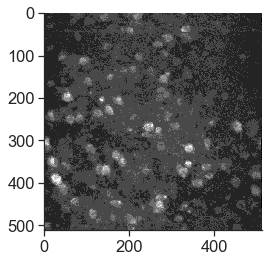

In [13]:
plt.imshow(dataset.max_projection, cmap='gray')

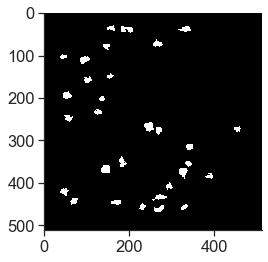

In [14]:
plt.imshow(dataset.segmentation_mask_image, cmap='gray')

In [15]:
dataset.dff_traces

,cell_roi_id,dff
cell_specimen_id,,
NaN,1158440104,"[0.9134337836289996, 0.5277122867889308, 0.271..."
NaN,1158440107,"[1.3972612963883824, 0.63540693918657, 0.52156..."
NaN,1158440141,"[2.1364288797601985, 2.01833528622113, 2.03609..."
NaN,1158440147,"[3.4135671837921904, 2.8325115979183577, 3.057..."
NaN,1158440186,"[1.1637369240364834, 1.2958555195342267, 0.917..."
NaN,1158440192,"[1.3367708071892535, 1.8401974053557986, 1.699..."
NaN,1158440203,"[1.026344172166413, 1.0125183143712986, 0.8274..."
NaN,1158440219,"[0.5618053553402615, 1.28745045633711, 0.91793..."
NaN,1158440240,"[1.4958763498745467, 1.1295992557142043, 1.234..."


Hmm...no 'cell_specimen_ids' indicates there is a problem here

### plot max projections for this container using `visual_behavior_analysis` plotting functions 

Note: this only works if you are on the `learning_mFISH` branch of `visual_behavior_analysis`

https://github.com/AllenInstitute/visual_behavior_analysis/tree/learning_mFISH

In [16]:
import visual_behavior.visualization.qc.container_plots as cp

getting up-to-date experiment_table from lims
including failed data
excluding Ai94 data


C:\Users\marinag\Documents\Code\AllenSDK\allensdk\brain_observatory\behavior\data_objects\stimuli\util.py:63: UserWarning:

Monitory delay calculation failed with ValueError
    "operands could not be broadcast together with shapes (2823,) (3646,) "
looking monitor delay up from table for rig: MESO.2 
delay: 0.03613 seconds

C:\Users\marinag\Documents\Code\AllenSDK\allensdk\brain_observatory\behavior\data_objects\metadata\subject_metadata\reporter_line.py:111: UserWarning:

Could not parse indicator from reporter because noneof the expected substrings were found in the reporter

C:\Users\marinag\Documents\Code\AllenSDK\allensdk\brain_observatory\behavior\data_objects\eye_tracking\eye_tracking_table.py:233: UserWarning:


in sync_file: \\allen\programs\mindscope\production\learning\prod0\specimen_1142290487\ophys_session_1153776022\1153776022_20220125T11404.h5
Error! The number of sync file frame times (221002) does not match the number of eye tracking frames (221003)!
returning empty e

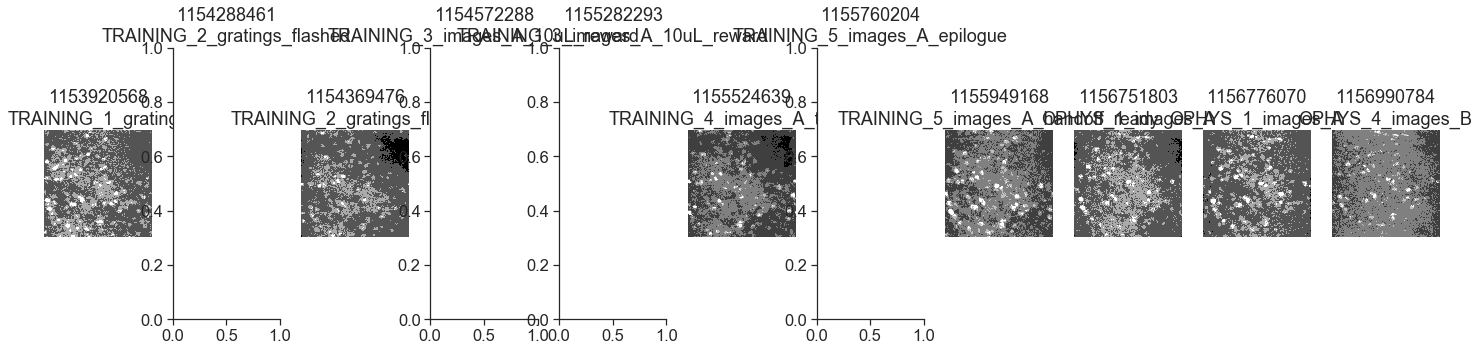

In [17]:
cp.plot_sdk_max_projection_images_for_container(ophys_container_id, save_figure=False)

In [ ]:
cp.plot_running_speed_for_container(ophys_container_id, save_figure=True)

In [18]:
cp.plot_trials_population_average_across_sessions(ophys_container_id, save_figure=True)

getting up-to-date experiment_table from lims
including failed data
excluding Ai94 data
1154288461
getting stimulus response df for 1154288461


C:\Users\marinag\Documents\Code\AllenSDK\allensdk\brain_observatory\behavior\data_objects\stimuli\util.py:63: UserWarning:

Monitory delay calculation failed with ValueError
    "operands could not be broadcast together with shapes (3131,) (3644,) "
looking monitor delay up from table for rig: MESO.2 
delay: 0.03613 seconds

C:\Users\marinag\Documents\Code\AllenSDK\allensdk\brain_observatory\behavior\data_objects\metadata\subject_metadata\reporter_line.py:111: UserWarning:

Could not parse indicator from reporter because noneof the expected substrings were found in the reporter



problem for 1154288461
dff_frames (len=10000) is not equal to number of split timestamps (len=39171).
1156776070
getting stimulus response df for 1156776070


C:\Users\marinag\Documents\Code\AllenSDK\allensdk\brain_observatory\behavior\data_objects\metadata\subject_metadata\reporter_line.py:111: UserWarning:

Could not parse indicator from reporter because noneof the expected substrings were found in the reporter

C:\Users\marinag\Documents\Code\AllenSDK\allensdk\brain_observatory\behavior\data_objects\eye_tracking\eye_tracking_table.py:233: UserWarning:


in sync_file: \\allen\programs\mindscope\production\learning\prod0\specimen_1142290487\ophys_session_1156589145\1156589145_20220207T11326.h5
Error! The number of sync file frame times (272758) does not match the number of eye tracking frames (272759)!
returning empty eye_tracking DataFrame

C:\Users\marinag\Documents\Code\AllenSDK\allensdk\brain_observatory\behavior\data_objects\metadata\subject_metadata\reporter_line.py:111: UserWarning:

Could not parse indicator from reporter because noneof the expected substrings were found in the reporter

C:\Users\marinag\Documents\Code\AllenSDK\alle

problem for 1156776070
[WinError 3] The system cannot find the path specified: '/allen/programs/mindscope/workgroups/learning/ophys/learning_project_cache\\stimulus_response_dfs\\changes\\interpolate_30Hz'
1155524639
getting stimulus response df for 1155524639


C:\Users\marinag\Documents\Code\AllenSDK\allensdk\brain_observatory\behavior\data_objects\metadata\subject_metadata\reporter_line.py:111: UserWarning:

Could not parse indicator from reporter because noneof the expected substrings were found in the reporter

C:\Users\marinag\Documents\Code\AllenSDK\allensdk\brain_observatory\behavior\data_objects\eye_tracking\eye_tracking_table.py:233: UserWarning:


in sync_file: \\allen\programs\mindscope\production\learning\prod0\specimen_1142290487\ophys_session_1155380558\1155380558_20220201T112343.h5
Error! The number of sync file frame times (221014) does not match the number of eye tracking frames (221015)!
returning empty eye_tracking DataFrame

C:\Users\marinag\Documents\Code\AllenSDK\allensdk\brain_observatory\behavior\data_objects\metadata\subject_metadata\reporter_line.py:111: UserWarning:

Could not parse indicator from reporter because noneof the expected substrings were found in the reporter

C:\Users\marinag\Documents\Code\AllenSDK\all

problem for 1155524639
[WinError 3] The system cannot find the path specified: '/allen/programs/mindscope/workgroups/learning/ophys/learning_project_cache\\stimulus_response_dfs\\changes\\interpolate_30Hz'
1155760204
getting stimulus response df for 1155760204


C:\Users\marinag\Documents\Code\AllenSDK\allensdk\brain_observatory\behavior\data_objects\metadata\subject_metadata\reporter_line.py:111: UserWarning:

Could not parse indicator from reporter because noneof the expected substrings were found in the reporter



problem for 1155760204
dff_frames (len=10000) is not equal to number of split timestamps (len=48431).
1156990784
getting stimulus response df for 1156990784


C:\Users\marinag\Documents\Code\AllenSDK\allensdk\brain_observatory\behavior\data_objects\metadata\subject_metadata\reporter_line.py:111: UserWarning:

Could not parse indicator from reporter because noneof the expected substrings were found in the reporter

C:\Users\marinag\Documents\Code\AllenSDK\allensdk\brain_observatory\behavior\data_objects\eye_tracking\eye_tracking_table.py:233: UserWarning:


in sync_file: \\allen\programs\mindscope\production\learning\prod0\specimen_1142290487\ophys_session_1156842547\1156842547_20220208T11611.h5
Error! The number of sync file frame times (272556) does not match the number of eye tracking frames (272557)!
returning empty eye_tracking DataFrame

C:\Users\marinag\Documents\Code\AllenSDK\allensdk\brain_observatory\behavior\data_objects\metadata\subject_metadata\reporter_line.py:111: UserWarning:

Could not parse indicator from reporter because noneof the expected substrings were found in the reporter

C:\Users\marinag\Documents\Code\AllenSDK\alle

problem for 1156990784
[WinError 3] The system cannot find the path specified: '/allen/programs/mindscope/workgroups/learning/ophys/learning_project_cache\\stimulus_response_dfs\\changes\\interpolate_30Hz'
1153920568
getting stimulus response df for 1153920568


C:\Users\marinag\Documents\Code\AllenSDK\allensdk\brain_observatory\behavior\data_objects\stimuli\util.py:63: UserWarning:

Monitory delay calculation failed with ValueError
    "operands could not be broadcast together with shapes (2823,) (3646,) "
looking monitor delay up from table for rig: MESO.2 
delay: 0.03613 seconds

C:\Users\marinag\Documents\Code\AllenSDK\allensdk\brain_observatory\behavior\data_objects\metadata\subject_metadata\reporter_line.py:111: UserWarning:

Could not parse indicator from reporter because noneof the expected substrings were found in the reporter

C:\Users\marinag\Documents\Code\AllenSDK\allensdk\brain_observatory\behavior\data_objects\eye_tracking\eye_tracking_table.py:233: UserWarning:


in sync_file: \\allen\programs\mindscope\production\learning\prod0\specimen_1142290487\ophys_session_1153776022\1153776022_20220125T11404.h5
Error! The number of sync file frame times (221002) does not match the number of eye tracking frames (221003)!
returning empty e

problem for 1153920568
[WinError 3] The system cannot find the path specified: '/allen/programs/mindscope/workgroups/learning/ophys/learning_project_cache\\stimulus_response_dfs\\changes\\interpolate_30Hz'
1154572288
getting stimulus response df for 1154572288


C:\Users\marinag\Documents\Code\AllenSDK\allensdk\brain_observatory\behavior\data_objects\metadata\subject_metadata\reporter_line.py:111: UserWarning:

Could not parse indicator from reporter because noneof the expected substrings were found in the reporter



problem for 1154572288
dff_frames (len=10000) is not equal to number of split timestamps (len=39106).
1154369476
getting stimulus response df for 1154369476


C:\Users\marinag\Documents\Code\AllenSDK\allensdk\brain_observatory\behavior\data_objects\metadata\subject_metadata\reporter_line.py:111: UserWarning:

Could not parse indicator from reporter because noneof the expected substrings were found in the reporter

C:\Users\marinag\Documents\Code\AllenSDK\allensdk\brain_observatory\behavior\data_objects\eye_tracking\eye_tracking_table.py:233: UserWarning:


in sync_file: \\allen\programs\mindscope\production\learning\prod0\specimen_1142290487\ophys_session_1154245678\1154245678_20220127T113036.h5
Error! The number of sync file frame times (221105) does not match the number of eye tracking frames (221106)!
returning empty eye_tracking DataFrame

C:\Users\marinag\Documents\Code\AllenSDK\allensdk\brain_observatory\behavior\data_objects\metadata\subject_metadata\reporter_line.py:111: UserWarning:

Could not parse indicator from reporter because noneof the expected substrings were found in the reporter

C:\Users\marinag\Documents\Code\AllenSDK\all

problem for 1154369476
[WinError 3] The system cannot find the path specified: '/allen/programs/mindscope/workgroups/learning/ophys/learning_project_cache\\stimulus_response_dfs\\changes\\interpolate_30Hz'
1155282293
getting stimulus response df for 1155282293


C:\Users\marinag\Documents\Code\AllenSDK\allensdk\brain_observatory\behavior\data_objects\metadata\subject_metadata\reporter_line.py:111: UserWarning:

Could not parse indicator from reporter because noneof the expected substrings were found in the reporter



problem for 1155282293
dff_frames (len=10000) is not equal to number of split timestamps (len=39171).
1155949168
getting stimulus response df for 1155949168


C:\Users\marinag\Documents\Code\AllenSDK\allensdk\brain_observatory\behavior\data_objects\running_speed\running_processing.py:368: UserWarning:

Time array is 1 value shorter than encoder array. Last encoder value removed


C:\Users\marinag\Documents\Code\AllenSDK\allensdk\brain_observatory\behavior\data_objects\metadata\subject_metadata\reporter_line.py:111: UserWarning:

Could not parse indicator from reporter because noneof the expected substrings were found in the reporter

C:\Users\marinag\Documents\Code\AllenSDK\allensdk\brain_observatory\behavior\data_objects\eye_tracking\eye_tracking_table.py:233: UserWarning:


in sync_file: \\allen\programs\mindscope\production\learning\prod0\specimen_1142290487\ophys_session_1155848487\1155848487_20220203T114150.h5
Error! The number of sync file frame times (273014) does not match the number of eye tracking frames (273015)!
returning empty eye_tracking DataFrame

C:\Users\marinag\Documents\Code\AllenSDK\allensdk\brain_observatory\behavior\da

problem for 1155949168
[WinError 3] The system cannot find the path specified: '/allen/programs/mindscope/workgroups/learning/ophys/learning_project_cache\\stimulus_response_dfs\\changes\\interpolate_30Hz'
1156751803
getting stimulus response df for 1156751803


C:\Users\marinag\Documents\Code\AllenSDK\allensdk\brain_observatory\behavior\data_objects\running_speed\running_processing.py:368: UserWarning:

Time array is 1 value shorter than encoder array. Last encoder value removed


C:\Users\marinag\Documents\Code\AllenSDK\allensdk\brain_observatory\behavior\data_objects\metadata\subject_metadata\reporter_line.py:111: UserWarning:

Could not parse indicator from reporter because noneof the expected substrings were found in the reporter

C:\Users\marinag\Documents\Code\AllenSDK\allensdk\brain_observatory\behavior\data_objects\eye_tracking\eye_tracking_table.py:233: UserWarning:


in sync_file: \\allen\programs\mindscope\production\learning\prod0\specimen_1142290487\ophys_session_1156039109\1156039109_20220204T11952.h5
Error! The number of sync file frame times (272777) does not match the number of eye tracking frames (272778)!
returning empty eye_tracking DataFrame

C:\Users\marinag\Documents\Code\AllenSDK\allensdk\brain_observatory\behavior\dat

problem for 1156751803
[WinError 3] The system cannot find the path specified: '/allen/programs/mindscope/workgroups/learning/ophys/learning_project_cache\\stimulus_response_dfs\\changes\\interpolate_30Hz'


AttributeError: 'DataFrame' object has no attribute 'ophys_experiment_id'